Lab01
=====

###  Context
#### Support Vector Machine
   + Support Vector Machine Classifier
   + Support Vector Machine Regressor
   + One-Class Support Vector Machine
   + Cross Validation

## Support Vector Machine
Support Vector Machine(SVM, 서포트 벡터 머신)는 주어진 데이터 집합을 바탕으로하여 두 카테고리(이진 분류의 경우) 사이의 간격(Margin, 마진)을 최대화하는 데이터 포인트(Support Vector, 서포트 벡터)를 찾아내고, 그 서포트 벡터에 수직인 경계를 통해 데이터를 분류하는 알고리즘입니다.<br><br>
<img src="./Images/SVM.png" alt="Support Vector machine" style="height: 400px"/>

### 왜 마진을 최대화 할까요?
서포트 벡터 머신에서 나오는 마진은 물건을 판매할때 마진이 20%다 라고 말하는 그 마진이 맞습니다. 경계면과의 마진을 최대화 하는 것이 왜 분류를 잘하게 할까요? 

#### 경험적 위험 최소화(Empirical risk minimization, ERM)
경험적 위험 최소화란, 주어진 훈련 데이터에 대해 오차를 최소화 하는 방식을 말합니다. <br>
비용 함수를 정의하고, 해당 비용 함수를 최소화하도록 모델을 학습시키는 방식을 뜻합니다.<br>
하지만, 주어진 훈련 데이터에 대해 오차를 최소화하다보니 관측하지 못한 데이터에 대해서는 좋은 성능을 내지 못한다는 단점이 있습니다.<br> Ex) Neural Network, Decision Tree 
#### 구조적 위험 최소화(Structural risk minimization, SRM)
구조적 위험 최소화란, 오차 최소화를 일반화하여 관측되지 않은 데이터에 대해서도 오차를 최소화 할 수 있는 방식입니다.<br>
서포트 벡터 머신은 서로 다른 클래스 사이에서 간격을 최대화 하는 경계를 구성하여 구조적으로 위험을 최소화하는 모델입니다.<br><br>
$$어떤\ 분류\ 모델이\ 더\ 좋을까요??$$
<img src="./Images/ERM_SRM.png" alt="ERM_SRMe" style="height: 280px"/>


### 그렇다면 마진이 최대인 경계를 구성하는 서포트 벡터를 어떻게 구할까요?
다음 수식을 통해 서포트 벡터를 구하고, 경계를 결정할 수 있습니다.<br>

일단 첫 번째 수식을 살펴보면, 내부의 min term은 가장 가까운 n번째 데이터 포인트(서포트 벡터)를 의미합니다. 그리고 외부의 max term은 간격(Margin)을 최대화하는 W, b를 의미합니다.<br>
$$ max \big( {{1\over||w||}min_n[t_n(w^T\phi(X_n)+b)]  } \big) $$<br>
일단 간격을 최대화하는 W에 대해서는 분수를 뒤집고 제곱한 값의 min을 구하는 것과 동일한 식이 됩니다. <br>
마지막식에서 생겨난 1/2은 미분했을 때 계수를 1로 만들어 식을 깔끔하게 정리하기 위해 임의로 추가한 계수입니다.<br>
$$ max{1\over||w||} \rightarrow min{||w||} \rightarrow min{1\over2}||w||^2 $$<br>
이제 전체 문제를 해결하는 식을 살펴보겠습니다. 전체 문제는 간격을 최대화하며, 경계면과 가장 가까운 서포트 벡터를 찾는 최적화 문제가 됩니다. <br>
해당 문제는 그냥 해결하기 어렵기 때문에 라그랑주 승수를 사용해 최적화합니다. 라그랑주 승수는 문제에 제약조건을 부여해 최적화 문제를 쉽게 해결할 수 있도록 합니다.<br>
**물론 쉽다는 말이 일반 사용자에게 쉽다는 의미는 아닙니다.**<br><br>

**Primal 수식**
$$ L_P = min\big({1\over2}||w||^2 - \sum^N_{n=1}a_n\big\{{t_n{(w^T\phi(X_n)+b)-1}\big\}}\big)$$

**제약조건**
$$ w = \sum^N_{n=1}{a_n t_n\phi(X_n)}$$
$$ 0 = \sum^N_{n=1}{a_n t_n}$$

슬슬 수식이 복잡해지기 시작했습니다. 해당 수식은 다음과 같이 변경될 수 있습니다.<br>

**Dual 수식**
$$\widetilde{L}_D = max{\big(\sum^N_{n=1}{a_n} - {1\over2}\sum^N_{n=1}\sum^N_{m=1}{a_na_mt_nt_mk(X_n,X_m)}}\big)$$

**제약조건**
$$ a_n \geq 0\ \ \ \ \ \  n=1,...,N,$$
$$ \sum^N_{n=1}{a_nt_n} = 0 $$

마지막 수식을 풀면 우리가 원하는 경계면을 구할 수 있습니다.<br>
수식이 정말 복잡하죠? 해당 수식이 이해가지 않으시거나 풀지 못하시더라도 상관없습니다. SVM의 정확한 컨셉만 이해하시고 넘어가셔도 충분합니다.

### Cost : Soft or Hard
SVM에는 Soft Margin, Hard Margin 이라는 말이 있습니다. 단어 자체에서도 유추할 수 있으시겠지만, Soft Margin은 유연한 경계면을 만들어내고 Hard Margin은 분명하게 나누는 경계면을 만들어냅니다. 그렇다면 왜 Soft Margin이 필요한걸까요?
<img src = "./Images/Softmargin.png" alt="Softmargin"/>
다음과 같은 데이터 분포는 직선으로 두개의 데이터를 나누는 경계면을 만들기 어렵습니다. 현실에서도 우리가 최적의 답을 찾지 못할때 어느정도 비용(Cost, C)을 감수하면서 적절한 답을 찾는 것을 떠올려보세요.<br>
Soft Margin은 그런 원리입니다. 경계면을 조금씩 넘어가는 데이터들(비용, Cost)을 감수하면서 가장 차선의 경계면을 찾습니다.<br>
실제 알고리즘에서도 C(Cost)값을 통해 얼마나 비용을 감수할 것인지를 결정할 수 있습니다. 크면 클수록 Hard Margin을, 작으면 작을수록 Soft Margin을 만들어냅니다. <br>


### 저차원을 고차원으로 Kernel Trick
SVM은 기본적으로 선형 분류를 위한 경계면을 만들어냅니다. 그렇다면 어떻게 비선형 분류를 할 수 있을까요?<br>
<img src = "./Images/Hyperplane.png" alt="hyper"/>
저차원(2차원)에서는 선형 분리가 되지 않을 수 있지만, 고차원(3차원)에서는 선형 분리가 가능할 수 있습니다.<br>
이러한 원리를 바탕으로 선형 분리가 불가능한 저차원 데이터를 선형 분리가 가능한 어떤 고차원으로 보내 선형 분리를 할 수 있습니다.<br>
하지만, 저차원 데이터를 고차원으로 보내서 서포트 벡터를 구하고 저차원으로 내리는 과정에서 더 복잡해지고 연산량도 많아질것이 분명합니다. <br>
그래서 여기에서 Kernel Trick이라는 Mapping 함수를 사용합니다. Kernel Trick은 고차원 Mapping과 고차원에서의 내적 연산을 한번에 할 수 있는 방법입니다. <br>
이를 통해 여러가지 Kernel 함수를 통해 저차원에서 해결하지 못한 선형 분리를 고차원에서 해결할 수 있습니다.<br>

대표적인 Kernel 함수
- Linear (선형 함수)
- Poly   (다항식 함수)
- RBF    (방사기저 함수)
- Hyper-Tangent (쌍곡선 탄젠트 함수)

## SVM Regression
SVM 분류 모델에서 t<sub>n</sub>는 정답 레이블인 카테고리를 나타내는 변수입니다. <br>
SVM 분류 모델과 동일한 원리로 정답 레이블을 연속적인 변수로 바꿔주면 Support Vector Machine Regressor(SVR) 회귀 모델이 됩니다.

## One-Class SVM 
SVM 분류 모델이나, 회귀 모델에서 정답 레이블의 클래스는 2개 이상입니다. 기본적으로 이진 분류의 경우 2개이고, 다중 분류인 경우 클래스 개수 만큼입니다.<br>
회귀의 경우에는 정답 레이블에 연속적인 변수가 들어가므로 많은 수의 레이블이 존재합니다. <br>
이번에는 정답 레이블의 수가 1개이고, 이상치를 탐지하는 모델인 One-Class SVM을 배워보겠습니다.

### 이상치 탐지
이상치 탐지라는 용어를 지난 데이터 분석 기초 수업의 AutoEncoder 실습에서 소개해드렸었습니다.<br>
AutoEncoder는 입력과 동일한 출력이 나와야하는데, 그렇지 않은 경우 입력 데이터가 정상 데이터가 아니라는 원리를 이용해 이상치를 탐지했었습니다.<br>
서포트 벡터를 사용해, Margin을 최대화 하는 SVM으로 이상치를 해볼 수 있을까요?

### One-Class 분류
One-Class 분류를 이진 분류와 함께 비교하면 살펴보겠습니다. 이진 분류와 One-Class 분류는 형태가 비슷합니다.<br>
왼쪽의 그림은 이진 분류의 그림이고, 오른쪽의 그림은 One-Class 분류의 그림입니다. <br>
One-Class 이상치 탐지는 정상이 아닌 것들을 모두 비정상이라고 생각하고, 정상 데이터의 경계면을 벗어난 데이터는 모두 이상치라고 판단하는 것이 기본 원리입니다.
![binary_vs_novelty](./Images/Binary_vs_Novelty_1.png)
#### Generalization vs Specialization 
이진 분류의 경우 소수의 데이터일지라도 경계면의 확장을 저지하는 힘이 존재하는데, One-Class 분류의 경우 그렇지 않습니다.<br>
그래서 모델의 일반화와 특정화(상세화 라고도 합니다.)에 주의를 기울일 필요가 있습니다.
![binary_vs_novelty_2](./Images/Binary_vs_Novelty_2.png)

### SVM 기반의 One-Class 이상치 탐지는 어떻게 할까요
뭔가 자기만의 경계를 만들어내는 One-Class 분류에서 SVM의 향기가 나고있습니다. 

$$ 1-class\ SVM\ (1-SVM)\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ Support\ vector\ domain\ (data)\ description\ (SVDD)$$ 
![svm_based_novelty](./Images/SVM_Based_Novelty.png)
<br><br>
SVM 기반의 One-Class 방법은 One-Class SVM과 SVDD 두 가지 방법이 있습니다. <br>
어려워 보이는 수식이 있지만 개념만 이해하시면 됩니다. 기본 원리는 SVM의 원리를 따르고, 차이점에 대해 간단히 설명해드리겠습니다. <br>
One-Class SVM 이상치의 비율 v 값을 조절하여 경계를 만들어내는 방식이고, SVDD의 경우 중심 점 a와 반지름 R로 이루어진 원으로 경계를 만들어내는 방식입니다.
<br>
One-Class SVM의 파라미터별 차이를 나타낸 그림입니다.
![oneclass_SVM](./Images/oneclass_SVM.png)

## Cross Validation
교차 검증이라고 하는 Cross Validation은 모델을 실제로 사용하기 이전에 훈련 데이터에 대해 성능 평가하는 방법을 말합니다.<br>
Cross Validation의 목표는 학습하지 않은 데이터에 대해 좋은 결과를 낼 수 있는 모델을 선별하고 검증하기 위함입니다.<br><br>

일반적으로 k-fold Cross Validation이라고 합니다. k개로 훈련 데이터를 쪼개어 k-1개를 학습시키고, <br> 
1개를 검증하는 방식으로 k개의 평가 결과를 평균내어 모델의 평가 지표(CV Score)로 사용합니다.<br>
각 알고리즘마다 모델 평가 방식이 다르므로 모델에 따라 정확도, R<sup>2</sup> 등으로 CV Score를 얻을 수 있습니다.

#### 주의
반드시 학습용 데이터에 대해서만 검증하셔야 합니다. 훈련 데이터가 아닌 검증 데이터를 Cross Validation에 사용해 모델을 학습시킨 뒤<br>
검증 데이터 정확도가 높게 나왔다고 하시는 경우가 종종 있습니다.
![kfold](./Images/kfold.png)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

datapath = join('data','wine')

columns = list()
with open(join(datapath, 'wine_attributes.txt') ,'r') as f:
    columns = f.read().split('\n')
    

## 1. 데이터 살펴보기
이번 장에서 우리가 사용할 데이터는 178개의 행과 14개의 열로 이루어진 와인 데이터 입니다. <br>
와인 데이터가 가진 컬럼에 대해 간단히 살펴 보겠습니다.<br>
와인 데이터는 13개의 컬럼을 가지고 있으며, 3개의 등급으로 나누어진 데이터셋 입니다.<br>
해당 데이터셋은 등급 컬럼을 이용해 분류에 사용할 수도 있고, 클러스터링, 회귀, 차원축소 등 여러가지 머신러닝 기법에 사용될 수 있습니다.<br><br>
### Feature Description 
1. Alcohol : 알콜 도수.
2. Malic acid : 와인 특유의 신맛을 나타내는 성분.
3. Ash : 영양학에서, 음식물 속에 들어 있는 무기물 또는 그것의 전체 분량에 대한 비율을 이르는 말.
4. Alcalinity of ash : 무기물의 염기성 정도.
5. Magnesium : 마그네슘 함량.
6. Total phenols : 와인에 들어있는 페놀의 전체 양.
7. Flavonoids :  레드 와인의 페놀 성분 중 최대 90% 비율을 나타내는 폴리 페놀 성분들 플라보노이드 라고 한다. 떫은 맛을 내는 탄닌이 플라보노이드에 속한다.
8. Nonflavanoid phenols : 90% 성분을 제외한 10%의 페놀 성분들.
9. Proanthocyanins : 심장혈관 질환의 발병률을 낮추는데 도움을 주는 성분.
10. Color intensity	: 색의 진한 정도.
11. Hue : 와인을 잔에 따라 흔들었을 때 와인과 글라스의 경계 부분의 색깔이 다른 정도. Edge 라고도 한다.
12. OD280/OD315 of diluted wines
13. Proline : 와인의 아미노산 성분 중 가장 많은 양을 차지함.

In [2]:
data = pd.read_csv(join(datapath, 'wine.txt') , names = columns)

DataFrame.head() 함수로 처음 5개의 데이터를 살펴볼 수 있습니다.

In [3]:
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


클래스는 1,2,3 세 등급이 있습니다.<br>
pandas의 DataFrame은 특정 컬럼에 대해 논리 조건으로 행과 열을 추출할 수 있습니다.<br>
DataFrame.loc[논리조건] 을 이용해 와인 데이터를 모델에 입력으로 사용할 데이터 부분과 라벨부분으로 나누겠습니다.<br>

In [4]:
# x = data.loc[:(모든 행에 대해),'Alcohol':'Proline'(Alcohol 컬럼부터 Proline 컬럼까지))]
x = data.loc[:, 'Alcohol':'Proline']
y = data['Class']

In [5]:
x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 2. 간단한 전처리와 준비
wine 데이터는 13개의 컬럼을 가지고 있고, 하나의 데이터(행)는 13개의 차원으로 이루어진 벡터라고 볼 수 있습니다. 
13차원은 우리 눈으로 볼 수 있도록 표현하기 어려우므로 PCA를 통해 2차원으로 낮추어 시각화할 수 있도록 하겠습니다.
또한, 각 변수들의 값의 범위를 min-max 정규화를 통해 조정해주겠습니다.

In [7]:
for dim in x.columns:
        x[dim] -= np.min(x[dim])
        x[dim] /= np.max(x[dim])

In [8]:
# 주성분을 2개 추출하는 pca 모델 정의
pca = PCA(n_components=2)

# 데이터를 넣음과 동시에 주성분 2개를 추출
x = pca.fit_transform(x)

정상적으로 2개 주성분이 추출되었는지 확인해보겠습니다.

In [9]:
# 5개 데이터 확인
print(x[:5])


# x 데이터가 numpy array 이므로 y 데이터도 numpy array로 통일 시킵니다.
y = np.array(y)

[[-0.70633576 -0.25319275]
 [-0.4849768  -0.00882289]
 [-0.52117227 -0.18918722]
 [-0.82164366 -0.58090551]
 [-0.20254638 -0.05946657]]


데이터를 훈련 데이터와, 검증 데이터로 분리합니다.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state = 1993,
                                                   shuffle=True)

## 3_1. Sklearn으로 SVM 만들어보기
이제 SVM의 3개의 커널 Linear, Poly, Rbf를 사용해 분류하고 비교해보겠습니다.<br>
아쉽게도 Sklearn의 SVM은 tanh 커널을 지원하지 않기 때문에 3개만 비교해보겠습니다.<br>

In [11]:
# Sklearn의 SVM 분류모델의 이름은 SVC 입니다. 
# 매개 변수는 기본적으로 kernel, C를 사용해보시고, poly의 경우 다항식의 차수인 degree, rbf의 경우 gamma 값을 변경해보세요
# kernel은 'linear', 'poly', 'rbf', 'sigmoid'(tanh)가 있습니다.
C = 1
svm_linear = SVC(kernel='linear', C=C)
svm_poly = SVC(kernel='poly',  degree=3, C=C)
svm_rbf = SVC(kernel='rbf', gamma=0.7, C=C)
svm_sigmoid = SVC(kernel='sigmoid', C=C)

In [12]:
# 모델의 성능을 평가하기 위한 k(5)-fold cross validation을 수행해봅니다.
kfold = KFold(n_splits=5, shuffle=True, random_state=2019)

linear_results = cross_val_score(svm_linear, x_train, y_train, cv=kfold)
poly_results = cross_val_score(svm_poly, x_train, y_train, cv=kfold)
rbf_results = cross_val_score(svm_rbf, x_train, y_train, cv=kfold)
sigmoid_results = cross_val_score(svm_sigmoid, x_train, y_train, cv=kfold)

print('SVM Classifier linear kernel cv score : {:.2f}%'.format(np.mean(linear_results)*100))
print('SVM Classifier poly kernel cv score : {:.2f}%'.format(np.mean(poly_results)*100))
print('SVM Classifier rbf kernel cv score : {:.2f}%'.format(np.mean(rbf_results)*100))
print('SVM Classifier sigmoid(tanh) kernel cv score : {:.2f}%'.format(np.mean(sigmoid_results)*100))

SVM Classifier linear kernel cv score : 94.37%
SVM Classifier poly kernel cv score : 41.20%
SVM Classifier rbf kernel cv score : 95.17%
SVM Classifier sigmoid(tanh) kernel cv score : 94.37%


rbf - linear, sigmoid - poly 순서로 CV 점수가 나왔습니다. <br>
실제 테스트 데이터에 대해서도 비슷한 결과가 나올지 알아보겠습니다.

In [13]:
# 모델 학습
svm_linear.fit(x_train, y_train)
svm_poly.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)
svm_sigmoid.fit(x_train, y_train)

print('SVM Classifier linear kernel acc : {:.2f}%'.format(svm_linear.score(x_test, y_test)*100))
print('SVM Classifier poly kernel acc : {:.2f}%'.format(svm_poly.score(x_test, y_test)*100))
print('SVM Classifier rbf kernel acc : {:.2f}%'.format(svm_rbf.score(x_test, y_test)*100))
print('SVM Classifier sigmoid(tanh) kernel acc : {:.2f}%'.format(svm_sigmoid.score(x_test, y_test)*100))

SVM Classifier linear kernel acc : 96.30%
SVM Classifier poly kernel acc : 37.04%
SVM Classifier rbf kernel acc : 96.30%
SVM Classifier sigmoid(tanh) kernel acc : 96.30%


Cross-Validation과 비슷한 결과를 볼 수 있었습니다. 

In [14]:
# 영역을 그려주는 함수입니다.
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# 경계를 그려주는 함수입니다.
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 모델을 순차적으로 넣기 위해 튜플로 만들어줍니다.
models = (svm_linear,
          svm_poly,
          svm_rbf,
          svm_sigmoid)

titles = ('SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel',
          'SVC with sigmoid kernel'
         )

# 1행, 3열의 구성으로 시각화를 합니다.
fig, sub = plt.subplots(2, 2, figsize=(10, 10))

X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    # 경계면을 그립니다.
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    # 모든 데이터 포인트를 그립니다.
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### k-fold Cross Validation Ensemble 
k-fold 교차 검증을 통해 k개의 모델을 만들어 각 모델들의 검증을 해보고, 학습한 모델들을 앙상블을 통해 좋은 결과를 낼 수 있도록 해보겠습니다. 

In [15]:
# SVM 분류기에서 일반적으로 가장 좋은 성능을 내는 rbf 커널을 사용한 SVM 분류기 5개로 k-fold 앙상블을 해보겠습니다.
# k-fold에서 k의 수를 5로 하고, 5개의 모델을 만들어보겠습니다.

# rbf 커널을 사용한 SVM 모델을 5개 만듭니다.
# 확률로 서로 다른 모델의 앙상블을 하는 것이 편하므로, 각 모델이 추정하는 클래스의 확률을 추출할 수 있도록 probability 속성을 True로 사용합니다.
clfs = [SVC(kernel='rbf', gamma=0.7, C=C, probability=True),
        SVC(kernel='rbf', gamma=0.7, C=C, probability=True),
        SVC(kernel='rbf', gamma=0.7, C=C, probability=True),
        SVC(kernel='rbf', gamma=0.7, C=C, probability=True),
        SVC(kernel='rbf', gamma=0.7, C=C, probability=True)
]

# 5개의 fold를 생성할 k-fold 모델을 생성합니다. 
kf = KFold(n_splits=5)


In [16]:

# 모델을 지정할 인덱스 변수입니다.
i=0

# KFold 모델의 함수 중 KFold.split() 함수는 python 자료구조 중 generator를 반환하는데, 해당 자료구조는 for문으로 쉽게 사용할 수 있습니다.
for train_idx, test_idx in kf.split(x_train):
    # 각 분류기를 fold별 학습 데이터로 학습시킵니다.
    clfs[i].fit(x_train[train_idx], y_train[train_idx])
    # 학습된 분류기를 fold별 검증 데이터로 검증합니다.
    print('SVM_{} Classifier rbf Kernel CV score : {:.2f}%'.format(i+1, clfs[i].score(x_train[test_idx], y_train[test_idx])*100))
    i+=1

SVM_1 Classifier rbf Kernel CV score : 100.00%
SVM_2 Classifier rbf Kernel CV score : 100.00%
SVM_3 Classifier rbf Kernel CV score : 96.00%
SVM_4 Classifier rbf Kernel CV score : 88.00%
SVM_5 Classifier rbf Kernel CV score : 87.50%


각 fold에 따라 5개의 학습한 모델을 얻었습니다. 이제 각 모델이 test 데이터에 대해 반환하는 각 클래스별 확률을 통해 앙상블을 진행해보겠습니다.

In [17]:
# numpy.zeros 함수는 0으로 채워진 shape 크기의 행렬을 생성합니다.
# 해당 행렬은 5개의 모델이 반환하는 각 클래스의 확률을 담는 역할을 합니다.
result = np.zeros(shape=(len(x_test), 3))

# sklearn 모델은 predict_proba 라는 함수로 각 클래스별 확률을 반환할 수 있습니다. 5개의 모델이 test 데이터에 대해 반환하는 확률을 통해 앙상블을 진행합니다.
for i in range(len(clfs)):
    # test 데이터에 대해 각 모델이 추정하는 클래스의 확률을 합산합니다.
    result += clfs[i].predict_proba(x_test)

result 행렬이 담고있는 값을 5개정도 살펴보겠습니다.

In [18]:
result[:5]

array([[2.8688922 , 1.74430092, 0.38680688],
       [0.03721998, 0.08786621, 4.87491381],
       [0.03362453, 4.94510205, 0.02127342],
       [0.13183478, 0.11642858, 4.75173664],
       [0.02443797, 4.93837978, 0.03718225]])

가로 방향으로 클래스 0, 1, 2 에 대한 확률을 담고 있습니다. numpy.argmax 함수를 통해 5개의 모델이 추정하고 있는 가장 높은 확률을 뽑아 클래스를 정하겠습니다.<br>
가장 높은 확률을 뽑는 차원은 인덱스 값을 1(axis=1)을 갖는 차원, 즉 2번째 차원을 기준으로 가장 높은 확률을 뽑습니다.

In [19]:
result = np.argmax(result, axis=1)

참 값과의 비교를 통해 정확도를 계산해보겠습니다.

In [20]:
# np.equal 함수를 통해 True, False 결과를 얻고, Python에서는 True 값이 정수형으로 1을 나타내므로 모두 더해 True의 총 합을 구할 수 있습니다.
# result에 +1을 해주는 이유는, 클래스는 1,2,3 이기 때문에 인덱스를 추출한 result 행렬은 0,1,2 를 담고 있습니다. 이러한 이유로 1을 더해줍니다.
acc = (np.sum(np.equal(y_test, result+1)))/len(x_test)

In [21]:
print('SVM Classifier rbf kernel Cross Validation Ensemble acc : {:.2f}%'.format(acc*100))

SVM Classifier rbf kernel Cross Validation Ensemble acc : 98.15%


## 3_2 Sklearn으로 SVR 만들어보기
방금 전에는 SVM으로 3개의 클래스를 분류하는 모델을 만들어보았습니다. <br>
SVM 회귀 모델은 SVM 분류 모델과 동일한 원리를 사용해 경계면을 결정하고 차이점으로는 계산식에서 라벨 값이 범주형 변수가 아닌 연속 변수라는 점이 있습니다.<br>
이번에는 와인 데이터의 알콜 함량을 라벨 값으로 해서 모델을 학습시켜 보겠습니다. 

In [22]:
# 모든 컬럼을 x에 할당하고, y에 'Alcohol' 컬럼을 할당합니다.
x = data
y = data['Alcohol']

In [23]:
#그리고 x에서 'Alcohol' 컬럼을 제거합니다.
del x['Alcohol']

In [24]:
for dim in x.columns:
        x[dim] -= np.min(x[dim])
        x[dim] /= np.max(x[dim])
# pca를 통해 1개의 주성분을 찾고 바로 차원을 축소합니다.
# 회귀이므로,입력 변수의 차원이 1차원이어야 2차원으로 시각화가 가능합니다.
x = PCA(n_components = 1).fit_transform(x)

In [25]:
# Sklearn의 SVR 회귀모델의 이름은 SVR 입니다.
# 매개 변수는 기본적으로 kernel, C를 사용해보시고, poly의 경우 다항식의 차수인 degree, rbf의 경우 gamma 값을 변경해보세요
# kernel은 'linear', 'poly', 'rbf', 'sigmoid'(tanh)가 있습니다.
C = 1
svr_linear = SVR(kernel='linear', C=C)
svr_poly = SVR(kernel='poly', C=C, degree=2)
svr_rbf = SVR(kernel='rbf', C=C, gamma=0.1)
svr_sigmoid = SVR(kernel='sigmoid', C=C)

In [26]:
# 모델의 성능을 평가하기 위한 k(5)-fold cross validation을 수행해봅니다.
kfold = KFold(n_splits=5, shuffle=True, random_state=2019)

linear_results = cross_val_score(svr_linear, x, y, cv=kfold)
poly_results = cross_val_score(svr_poly, x, y, cv=kfold)
rbf_results = cross_val_score(svr_rbf, x, y, cv=kfold)
sigmoid_results = cross_val_score(svr_sigmoid, x, y, cv=kfold)

print('SVM Regressor linear kernel cv score : {:.3f}'.format(np.mean(linear_results)))
print('SVM Regressor poly kernel cv score : {:.3f}'.format(np.mean(poly_results)))
print('SVM Regressor rbf kernel cv score : {:.3f}'.format(np.mean(rbf_results)))
print('SVM Regressor sigmoid kernel cv score : {:.3f}'.format(np.mean(sigmoid_results)))

SVM Regressor linear kernel cv score : 0.017
SVM Regressor poly kernel cv score : 0.324
SVM Regressor rbf kernel cv score : 0.276
SVM Regressor sigmoid kernel cv score : -0.000


SVR 모델은 회귀 모델이기 때문에 R^2 를 반환합니다.<br>
poly - rbf - linear - sigmoid 순서로 CV 점수가 나왔습니다. 
실제 테스트 데이터에 대해서도 비슷한 결과가 나올지 알아보겠습니다.

In [27]:
# 모델 학습
svr_linear.fit(x, y)
svr_poly.fit(x, y)
svr_rbf.fit(x, y)
svr_sigmoid.fit(x, y)

print('SVM Regressor linear kernel R^2 : {:.3f}'.format(svr_linear.score(x, y)))
print('SVM Regressor poly kernel R^2 : {:.3f}'.format(svr_poly.score(x, y)))
print('SVM Regressor rbf kernel R^2 : {:.3f}'.format(svr_rbf.score(x, y)))
print('SVM Regressor sigmoid kernel R^2 : {:.3f}'.format(svr_sigmoid.score(x, y)))

SVM Regressor linear kernel R^2 : 0.058
SVM Regressor poly kernel R^2 : 0.334
SVM Regressor rbf kernel R^2 : 0.357
SVM Regressor sigmoid kernel R^2 : 0.012


Cross-Validation과 약간 다르지만 비슷한 결과를 볼 수 있었습니다. 이런 방식으로 어떤 모델이 더 좋을지 선택하고 학습하지 않은 데이터에 대한 일반화 성능도 알아볼 수 있습니다.<br>
시각화를 통해 살펴보겠습니다.

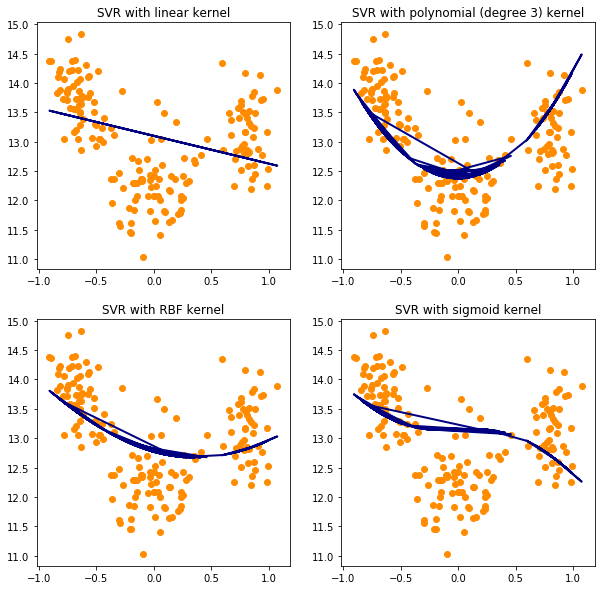

In [28]:
# 모델을 순차적으로 넣기 위해 튜플로 만들어줍니다.
models = (svr_linear,
          svr_poly,
          svr_rbf,
          svr_sigmoid)

titles = ('SVR with linear kernel',
          'SVR with polynomial (degree 3) kernel',
          'SVR with RBF kernel',
          'SVR with sigmoid kernel'
         )

# 그림을 그릴 1행 3열의 subplot 생성
fig, sub = plt.subplots(2, 2, figsize=(10, 10))

lw = 2
for svc, title, ax in zip(models, titles, sub.flatten()):
    # 모든 데이터 포인트를 그립니다.
    ax.scatter(x, y, color='darkorange', label='data')
    ax.plot(x, svc.predict(x), color='navy', lw=lw)
    ax.set_title(title)

plt.show()

깔끔한 데이터로 다시 살펴보겠습니다.

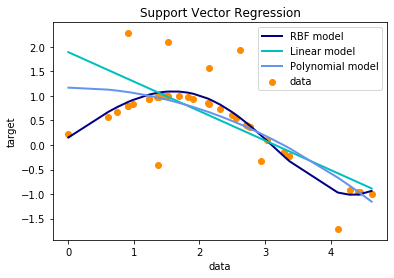

In [29]:
# 임의 데이터 생성
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# 노이즈 추가
y[::5] += 3 * (0.5 - np.random.rand(8))

# 모델 정의 및 학습
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# 시각화
lw = 2

# 전체 데이터 포인트를 그립니다.
plt.scatter(X, y, color='darkorange', label='data')
# 각 회귀 모델별 회귀 곡선을 그립니다.
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## 3_3. Sklearn으로 One-Class SVM 만들어보기 
Sklearn은 One-Class SVM 모델만 지원합니다. 이상치를 포함하는 임의의 데이터를 생성해 이상치를 탐지해보겠습니다.

In [36]:
# numpy의 random 패키지에 있는 정규 분포 생성 함수를 사용해 정상 데이터를 생성합니다. loc은 평균을 나타내며, scale은 표준편차를 나타냅니다.
random_x = np.random.normal(loc = 1, scale = 1, size = (100, 1))
random_y = np.random.normal(loc = 1, scale = 1, size = (100, 1))

# 이상 데이터를 생성합니다.
outlier_x = np.random.normal(loc = 5, scale = 1, size = (5, 1))
outlier_y = np.random.normal(loc = 2, scale = 5, size = (5, 1))

In [37]:
# numpy의 concatenate 함수로 정상 데이터와 이상 데이터를 하나로 합칩니다. axis=0은 0번 인덱스(1번째) 차원을 기준으로 데이터를 합치겠다는 의미입니다.
# ex) random_x의 차원은 (100, )이므로 1번째 차원인 100 을 기준으로 outlier_x와 합치므로 합친 데이터 x의 차원은 (105, ) 입니다.
# axis = 1은 1번 인덱스(2번째) 차원을 기준으로 데이터를 합칩니다. 결과적으로 2개의 컬럼을 가진 행렬이 됩니다.
X = np.concatenate((np.concatenate((random_x, outlier_x), axis = 0),
                    np.concatenate((random_y, outlier_y), axis = 0)),
                   axis=1)

적당히 모인 데이터를 정상 데이터로, 멀리 떨어져있는 데이터를 이상 데이터로 간주하고 One-Class SVM 모델을 적용하겠습니다.

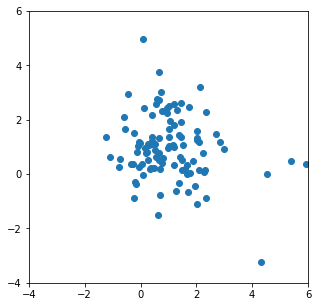

In [32]:
# 데이터 분포 시각화
plt.figure(figsize = (5,5))
plt.scatter(X[:,0], X[:, 1])
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.show()

In [33]:
# Sklearn의 One-Class SVM 모델의 이름은 OneClassSVM 입니다.
# 매개 변수는 기본적으로 kernel, nu를 사용해보시고, poly의 경우 다항식의 차수인 degree, rbf의 경우 gamma 값을 변경해보세요.
# kernel은 'linear', 'poly', 'rbf', 'sigmoid'(tanh)가 있습니다.
nu = 0.1
oc_svm_lin = OneClassSVM(kernel='linear', nu = nu)
oc_svm_poly = OneClassSVM(kernel='poly', degree=3, nu = nu)
oc_svm_rbf = OneClassSVM(kernel='rbf', gamma=0.1, nu = nu)
oc_svm_sigmoid = OneClassSVM(kernel='sigmoid', nu = nu)

# 3개의 모델을 학습시키세요
oc_svm_lin.fit(X)
oc_svm_poly.fit(X)
oc_svm_rbf.fit(X)
oc_svm_sigmoid.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
            kernel='sigmoid', max_iter=-1, nu=0.1, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

In [34]:
# 모델을 순차적으로 넣기 위해 튜플로 만들어줍니다.
models = (oc_svm_lin, 
          oc_svm_poly, 
          oc_svm_rbf, 
          oc_svm_sigmoid)

titles = ('One-Class SVM with linear kernel',
          'One-Class SVM with poly kernel', 
          'One-Class SVM with rbf kernel',
          'One-Class SVM with sigmoid kernel', )

# plot에 테두리를 그리기 위한 망 좌표 생성
xx, yy = np.meshgrid(np.linspace(-4, 6, 150),
                     np.linspace(-4, 6, 150))

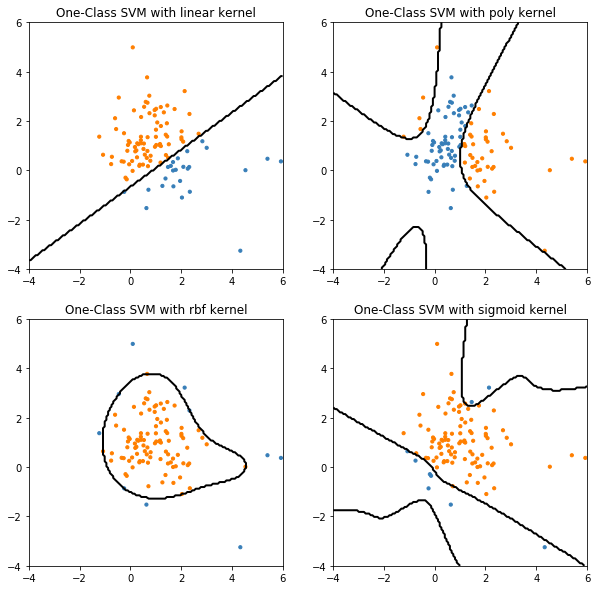

In [35]:
# 그림을 그릴 1행 3열의 subplot 생성
fig, sub = plt.subplots(2, 2, figsize=(10, 10))

for oc_svm, title, ax in zip(models, titles, sub.flatten()):
    # 망 좌표를 모델에 넣어 테두리 값을 얻습니다.
    Z = oc_svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # One-Class 분류된 결과를 얻습니다.
    pred = oc_svm.predict(X)
    
    # 테두리를 그립니다.
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    colors = np.array(['#377eb8', '#ff7f00'])
    # 전체 데이터 포인트를 그립니다.
    ax.scatter(X[:,0], X[:,1], s=10, color=colors[(pred + 1) // 2])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

plt.show()

### Reference
- SVM : https://ko.wikipedia.org/wiki/서포트_벡터_머신 ,<br> Christopher M. Bishop. Pattern Recognition and Machine Learning. Springer, 2006.
- SVM Cost, gamma : https://bskyvision.com/163
- SVM Demo : https://www.csie.ntu.edu.tw/~cjlin/libsvm/#nuandone
- SVM Example : https://scikit-learn.org/stable/modules/svm.html
- SVR Example : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
- One-Class SVM Example : https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html#sphx-glr-auto-examples-plot-anomaly-comparison-py
- Cross Validation : https://3months.tistory.com/321
- Ensemble : https://en.wikipedia.org/wiki/Ensemble_learning, https://swalloow.github.io/bagging-boosting